In [1]:
import time

# Start timing the entire notebook
notebook_start_time = time.time()

In [2]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import resample

import warnings
warnings.filterwarnings("ignore")


In [3]:
pip install pycrostates

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Define frequency bands
frequency_bands = {
    # 'delta': (0.5, 4),
    # 'theta': (4, 8),
    'alpha': (8, 13),
    # 'beta': (13, 30),
    # 'gamma': (30, 45)
}

for band_name, (l_freq, h_freq) in frequency_bands.items():
    print(f"{band_name} Band - Low freq = {l_freq} Hz and High freq =  {h_freq} Hz")

alpha Band - Low freq = 8 Hz and High freq =  13 Hz


# Pre-Processing Alzheimer Patients

In [5]:
# Alzheimer's EEG files (Filtered Derivatives)
alzheimer_files = [
    '/kaggle/input/alzheimerderivatives/sub-001_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-002_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-003_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-004_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-005_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-006_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-007_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-008_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-009_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-010_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-011_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-012_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-013_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-014_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-015_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-016_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-017_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-018_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-019_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-020_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-021_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-022_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-023_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-024_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-025_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-026_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-027_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-028_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-029_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-030_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-031_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-032_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-033_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-034_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-035_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-036_task-eyesclosed_eeg.set',

]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon
from pycrostates.io import ChData
from pycrostates.preprocessing import extract_gfp_peaks, resample

## Group-level analysis from individual clusters

In [7]:
patients_ad = alzheimer_files # Taking all AD file paths
durations_ad = []

individual_cluster_centers = list()

for file_path in patients_ad:
    raw = mne.io.read_raw_eeglab(file_path, preload=True)  #Loading EEG file
    durations_ad.append(raw.times[-1]) # For minimum duration purpose
    raw.pick("eeg")
    raw.crop(30,40)  # Cut each patient data from 30 seconds to 40 seconds (10 seconds)
    raw.set_eeg_reference("average") # Applying CAR( Common average reference)
    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(raw, min_peak_distance=20) #extracting GFP peaks
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=-1)
    individual_cluster_centers.append(ModK.cluster_centers_)
    
group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)
print("DONE")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
DONE


In [8]:
min_duration = min(durations_ad)
min_duration

599.798

## Group level clustering

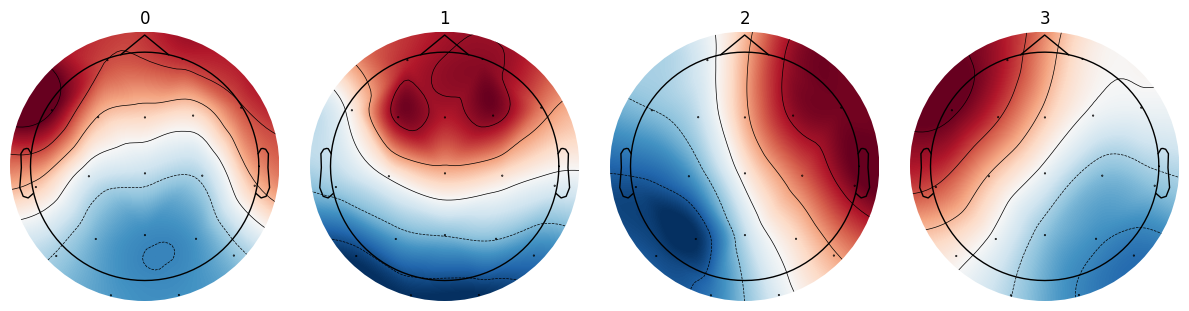

In [9]:
# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=-1)
ModK.plot();

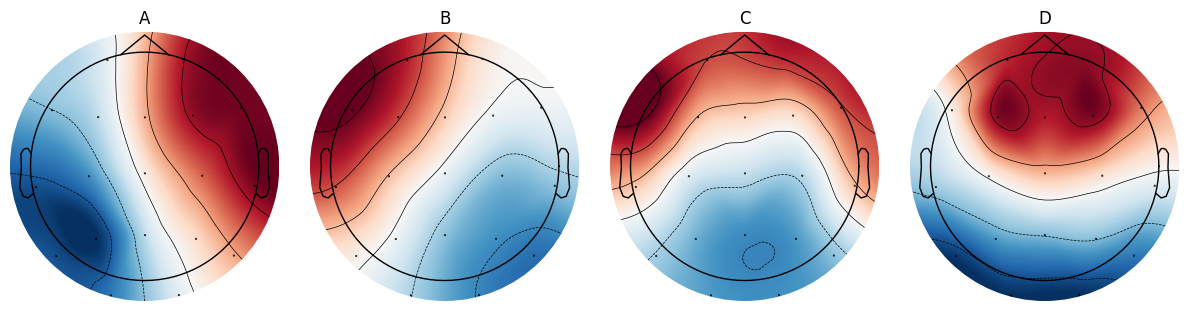

In [10]:
ModK.reorder_clusters(order=[2, 3, 0, 1])
ModK.rename_clusters(new_names=["A", "B", "C", "D"])
# Plot and modify
fig = ModK.plot();  # Generate the plot
# fig.savefig("group_level_clustering_AD.png", dpi=300)  # Save the plot as a PNG file

In [11]:
subject_ids = np.arange(1, len(alzheimer_files)+1) # total 29 patients AD

##  Microstate Parameters AD

Data Overview

Duration per patient: 479.098 seconds (~8 minutes)

Sampling rate: 500 Hz

Epoch Analysis
* Epoch length: 5 seconds
* Epochs per patient: 479.098 / 5 = 95 epochs

Total Segments  
* Number of patients: 23
* Total epochs: 23 * 95 = 2,185 segments

In [12]:
ms_data = list()
length = 0
transition_prob = pd.DataFrame()

for file_path, subject_id in zip(patients_ad, subject_ids):  # Ensure subject IDs align with file paths
    # Load Data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw.pick("eeg")
    raw.crop(0, 479.098)  # Crop the dataset to speed up computation taking 9 minutes
    raw.set_eeg_reference("average")
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)  # Apply band-pass filter (e.g., alpha band)
    
    # Define epoch duration (5 seconds) and create epochs
    epoch_duration = 5  # seconds
    epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration)
    epochs.load_data()
    
    for i in range(len(epochs)):
    
        # Perform microstate segmentation on the entire Epochs object
        # segmentation = ModK.predict(epochs[i] , factor=10, half_window_size=8)  # Perform microstate segmentation
        segmentation = ModK.predict(epochs[i])  # Perform microstate segmentation
    
        # Process segmentation results to compute microstate parameters
        parameters = segmentation.compute_parameters()  # Compute parameters for all epochs
    
        # Compute transition probabilities
        T_observed = segmentation.compute_transition_matrix()

        # Create a DataFrame for the transition matrix and add it to single_row_df
        transition_row = pd.DataFrame([pd.DataFrame(T_observed).values.flatten()])
        transition_prob = pd.concat([transition_prob, transition_row], ignore_index=True)
        
        # parameters["subject_id"] = subject_id
        ms_data.append(parameters)
    

# Convert `ms_data` to a more structured format like a DataFrame (optional, for analysis)
import pandas as pd
ms_data_df = pd.DataFrame(ms_data)


In [13]:
# Rename columns and index
columns = ['A', 'B', 'C', 'D']
index = ['A', 'B', 'C', 'D']

# Create a list of column names
new_columns = []
for i in columns:
    for j in columns:
        new_columns.append(f"{i}_{j}")

In [14]:
transition_prob.columns = new_columns

transition_prob

,A_A,A_B,A_C,A_D,B_A,B_B,B_C,B_D,C_A,C_B,C_C,C_D,D_A,D_B,D_C,D_D
0,0.0,0.363636,0.318182,0.318182,0.463768,0.0,0.333333,0.202899,0.285714,0.324675,0.0,0.389610,0.465753,0.178082,0.356164,0.0
1,0.0,0.333333,0.269231,0.397436,0.567568,0.0,0.243243,0.189189,0.144928,0.289855,0.0,0.565217,0.309524,0.345238,0.345238,0.0
2,0.0,0.400000,0.247059,0.352941,0.500000,0.0,0.236842,0.263158,0.348485,0.424242,0.0,0.227273,0.369231,0.215385,0.415385,0.0
3,0.0,0.246753,0.389610,0.363636,0.629032,0.0,0.177419,0.193548,0.173913,0.434783,0.0,0.391304,0.373134,0.208955,0.417910,0.0
4,0.0,0.231707,0.402439,0.365854,0.593750,0.0,0.156250,0.250000,0.162162,0.270270,0.0,0.567568,0.375000,0.272727,0.352273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.0,0.500000,0.195122,0.304878,0.390244,0.0,0.341463,0.268293,0.290323,0.338710,0.0,0.370968,0.449275,0.289855,0.260870,0.0
2181,0.0,0.432432,0.175676,0.391892,0.397059,0.0,0.382353,0.220588,0.246154,0.307692,0.0,0.446154,0.424658,0.205479,0.369863,0.0
2182,0.0,0.400000,0.257143,0.342857,0.426471,0.0,0.382353,0.191176,0.289855,0.231884,0.0,0.478261,0.285714,0.342857,0.371429,0.0
2183,0.0,0.400000,0.337500,0.262500,0.500000,0.0,0.175676,0.324324,0.189655,0.500000,0.0,0.310345,0.523810,0.190476,0.285714,0.0


In [15]:
ms_data_df = pd.concat([ms_data_df, transition_prob], axis=1)
ms_data_df = ms_data_df.drop(["A_A","B_B","C_C","D_D"], axis=1)

In [16]:
ms_data_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,A_D,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C
0,0.616782,0.075527,17.691998,0.253719,0.014341,0.601098,0.042332,14.073181,0.156815,0.011143,...,0.318182,0.463768,0.333333,0.202899,0.285714,0.324675,0.389610,0.465753,0.178082,0.356164
1,0.615911,0.085549,15.625000,0.221955,0.014205,0.576786,0.048451,15.024038,0.177885,0.011840,...,0.397436,0.567568,0.243243,0.189189,0.144928,0.289855,0.565217,0.309524,0.345238,0.345238
2,0.669216,0.144568,17.144010,0.306172,0.017859,0.592685,0.041344,15.328762,0.160549,0.010474,...,0.352941,0.500000,0.236842,0.263158,0.348485,0.424242,0.227273,0.369231,0.215385,0.415385
3,0.650244,0.128484,15.530456,0.286406,0.018442,0.604290,0.045684,12.706737,0.151271,0.011905,...,0.363636,0.629032,0.177419,0.193548,0.173913,0.434783,0.391304,0.373134,0.208955,0.417910
4,0.553203,0.049266,16.876779,0.192355,0.011398,0.637375,0.056603,13.013420,0.148841,0.011438,...,0.365854,0.593750,0.156250,0.250000,0.162162,0.270270,0.567568,0.375000,0.272727,0.352273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.745157,0.203930,16.446049,0.337746,0.020537,0.758488,0.187436,16.446049,0.283594,0.017244,...,0.304878,0.390244,0.341463,0.268293,0.290323,0.338710,0.370968,0.449275,0.289855,0.260870
2181,0.725185,0.169149,14.943457,0.282310,0.018892,0.708304,0.093980,13.731826,0.184976,0.013471,...,0.391892,0.397059,0.382353,0.220588,0.246154,0.307692,0.446154,0.424658,0.205479,0.369863
2182,0.767419,0.170363,14.039310,0.269555,0.019200,0.772316,0.192193,13.638187,0.257120,0.018853,...,0.342857,0.426471,0.382353,0.191176,0.289855,0.231884,0.478261,0.285714,0.342857,0.371429
2183,0.755871,0.183739,16.297787,0.340443,0.020889,0.779965,0.253226,14.889336,0.283702,0.019054,...,0.262500,0.500000,0.175676,0.324324,0.189655,0.500000,0.310345,0.523810,0.190476,0.285714


In [17]:
ms_data_df['label'] = 1  # 1 For alzheimer

# **Pre-Processing Normal Patient**

In [11]:
# Normal EEG files (Filtered Derivatives)
normal_files = [
    '/kaggle/input/alzheimerderivatives/sub-037_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-038_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-039_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-040_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-041_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-042_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-043_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-044_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-045_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-046_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-047_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-048_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-049_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-050_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-051_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-052_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-053_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-054_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-055_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-056_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-057_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-058_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-059_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-060_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-061_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-062_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-063_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-064_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-065_task-eyesclosed_eeg.set',
]

## Group-level analysis from individual clusters HC

In [12]:
patients_n = normal_files
durations = []
# individual_gfp_peaks = list()
individual_cluster_centers = list()

for file_path in patients_n:
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    durations.append(raw.times[-1])
    raw.pick("eeg")
    raw.crop(30,40)  # Cut each patient data from 60 seconds to 90 seconds (30 seconds)
    raw.set_eeg_reference("average")
    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(raw, min_peak_distance=20)
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=-1)
    individual_cluster_centers.append(ModK.cluster_centers_)
    
group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)
print("DONE")

DONE


In [13]:
min_duration = min(durations)
min_duration

753.038

## Group level clustering HC

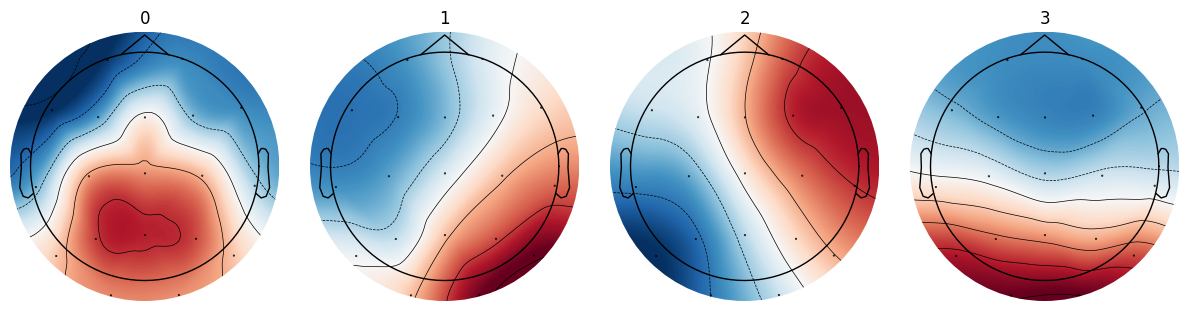

In [14]:
# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=-1)
ModK.plot();

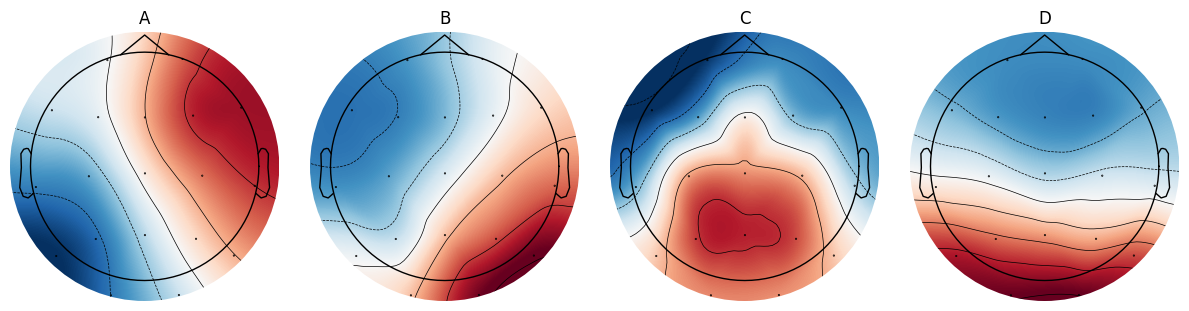

In [15]:
ModK.reorder_clusters(order=[2, 1, 0, 3])
ModK.rename_clusters(new_names=["A", "B", "C", "D"])
# Plot and modify
fig = ModK.plot();  # Generate the plot
# fig.savefig("group_level_clustering_HC.png", dpi=300)  # Save the plot as a PNG file

In [23]:
subject_ids = np.arange(1, len(normal_files)+1)

## Microstate Parameters HC

In [24]:
ms_data_hc = list()
length = 0
transition_prob_hc = pd.DataFrame()

for file_path, subject_id in zip(patients_n, subject_ids):  # Ensure subject IDs align with file paths
    # Load Data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw.pick("eeg")
    raw.crop(0, 479.098)  # Crop the dataset to speed up computation
    raw.set_eeg_reference("average")
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)  # Apply band-pass filter (e.g., theta band)
    
    # Define epoch duration (5 seconds) and create epochs
    epoch_duration = 5  # seconds
    epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration)
    epochs.load_data()
    
    for i in range(len(epochs)):
    
        # Perform microstate segmentation on the entire Epochs object
        # segmentation = ModK.predict(epochs[i] , factor=10, half_window_size=8)  # Perform microstate segmentation
        segmentation = ModK.predict(epochs[i])  # Perform microstate segmentation
    
        # Process segmentation results to compute microstate parameters
        parameters = segmentation.compute_parameters()  # Compute parameters for all epochs

        # Compute transition probabilities
        T_observed = segmentation.compute_transition_matrix()

        # Create a DataFrame for the transition matrix and add it to single_row_df
        transition_row = pd.DataFrame([pd.DataFrame(T_observed).values.flatten()])
        transition_prob_hc = pd.concat([transition_prob_hc, transition_row], ignore_index=True)

        # parameters["subject_id"] = subject_id
        ms_data_hc.append(parameters)
    

# Convert `ms_data` to a more structured format like a DataFrame (optional, for analysis)
import pandas as pd
ms_data_hc_df = pd.DataFrame(ms_data_hc)


In [25]:
transition_prob_hc.columns = new_columns

transition_prob_hc

,A_A,A_B,A_C,A_D,B_A,B_B,B_C,B_D,C_A,C_B,C_C,C_D,D_A,D_B,D_C,D_D
0,0.0,0.171875,0.312500,0.515625,0.602941,0.0,0.205882,0.191176,0.023810,0.119048,0.0,0.857143,0.277108,0.626506,0.096386,0.0
1,0.0,0.209677,0.306452,0.483871,0.548387,0.0,0.193548,0.258065,0.208333,0.354167,0.0,0.437500,0.264706,0.470588,0.264706,0.0
2,0.0,0.172414,0.224138,0.603448,0.583333,0.0,0.291667,0.125000,0.022222,0.088889,0.0,0.888889,0.178571,0.702381,0.119048,0.0
3,0.0,0.435484,0.145161,0.419355,0.402778,0.0,0.236111,0.361111,0.155556,0.244444,0.0,0.600000,0.333333,0.423077,0.243590,0.0
4,0.0,0.260274,0.178082,0.561644,0.580247,0.0,0.246914,0.172840,0.211538,0.346154,0.0,0.442308,0.192308,0.564103,0.243590,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.0,0.129032,0.397849,0.473118,0.769231,0.0,0.128205,0.102564,0.239437,0.549296,0.0,0.211268,0.235294,0.411765,0.352941,0.0
2181,0.0,0.166667,0.371795,0.461538,0.523077,0.0,0.338462,0.138462,0.356164,0.301370,0.0,0.342466,0.253521,0.422535,0.323944,0.0
2182,0.0,0.359551,0.235955,0.404494,0.442857,0.0,0.214286,0.342857,0.377049,0.147541,0.0,0.475410,0.404494,0.325843,0.269663,0.0
2183,0.0,0.393617,0.255319,0.351064,0.389610,0.0,0.233766,0.376623,0.410714,0.196429,0.0,0.392857,0.493976,0.337349,0.168675,0.0


In [26]:
ms_data_hc_df = pd.concat([ms_data_hc_df, transition_prob_hc], axis=1)
ms_data_hc_df = ms_data_hc_df.drop(["A_A","B_B","C_C","D_D"], axis=1)

In [27]:
ms_data_hc_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,A_D,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C
0,0.686763,0.019105,13.046969,0.086712,0.006646,0.788043,0.134697,13.649137,0.243677,0.017853,...,0.515625,0.602941,0.205882,0.191176,0.023810,0.119048,0.857143,0.277108,0.626506,0.096386
1,0.675856,0.076488,12.474849,0.183501,0.014710,0.754222,0.187964,12.474849,0.313883,0.025161,...,0.483871,0.548387,0.193548,0.258065,0.208333,0.354167,0.437500,0.264706,0.470588,0.264706
2,0.702006,0.027637,11.655949,0.139068,0.011931,0.751414,0.101766,14.670418,0.222669,0.015178,...,0.603448,0.583333,0.291667,0.125000,0.022222,0.088889,0.888889,0.178571,0.702381,0.119048
3,0.705919,0.032145,12.464817,0.118617,0.009516,0.728507,0.073233,14.475271,0.175714,0.012139,...,0.419355,0.402778,0.236111,0.361111,0.155556,0.244444,0.600000,0.333333,0.423077,0.243590
4,0.669041,0.020867,14.913341,0.174123,0.011676,0.661832,0.026783,16.324063,0.228940,0.014025,...,0.561644,0.580247,0.246914,0.172840,0.211538,0.346154,0.442308,0.192308,0.564103,0.243590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.759763,0.176687,18.629808,0.299679,0.016086,0.763773,0.139031,15.825321,0.209535,0.013241,...,0.473118,0.769231,0.128205,0.102564,0.239437,0.549296,0.211268,0.235294,0.411765,0.352941
2181,0.717210,0.190950,15.656363,0.277399,0.017718,0.707393,0.081161,13.046969,0.148936,0.011415,...,0.461538,0.523077,0.338462,0.138462,0.356164,0.301370,0.342466,0.253521,0.422535,0.323944
2182,0.704847,0.253887,18.145161,0.342339,0.018867,0.680205,0.060682,14.112903,0.172581,0.012229,...,0.404494,0.442857,0.214286,0.342857,0.377049,0.147541,0.475410,0.404494,0.325843,0.269663
2183,0.759212,0.261968,18.928715,0.363270,0.019191,0.710842,0.103829,15.505437,0.212646,0.013714,...,0.351064,0.389610,0.233766,0.376623,0.410714,0.196429,0.392857,0.493976,0.337349,0.168675


In [28]:
ms_data_hc_df['label'] = 0  # 0 For normal

In [29]:
ms_data_hc_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C,label
0,0.686763,0.019105,13.046969,0.086712,0.006646,0.788043,0.134697,13.649137,0.243677,0.017853,...,0.602941,0.205882,0.191176,0.023810,0.119048,0.857143,0.277108,0.626506,0.096386,0
1,0.675856,0.076488,12.474849,0.183501,0.014710,0.754222,0.187964,12.474849,0.313883,0.025161,...,0.548387,0.193548,0.258065,0.208333,0.354167,0.437500,0.264706,0.470588,0.264706,0
2,0.702006,0.027637,11.655949,0.139068,0.011931,0.751414,0.101766,14.670418,0.222669,0.015178,...,0.583333,0.291667,0.125000,0.022222,0.088889,0.888889,0.178571,0.702381,0.119048,0
3,0.705919,0.032145,12.464817,0.118617,0.009516,0.728507,0.073233,14.475271,0.175714,0.012139,...,0.402778,0.236111,0.361111,0.155556,0.244444,0.600000,0.333333,0.423077,0.243590,0
4,0.669041,0.020867,14.913341,0.174123,0.011676,0.661832,0.026783,16.324063,0.228940,0.014025,...,0.580247,0.246914,0.172840,0.211538,0.346154,0.442308,0.192308,0.564103,0.243590,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.759763,0.176687,18.629808,0.299679,0.016086,0.763773,0.139031,15.825321,0.209535,0.013241,...,0.769231,0.128205,0.102564,0.239437,0.549296,0.211268,0.235294,0.411765,0.352941,0
2181,0.717210,0.190950,15.656363,0.277399,0.017718,0.707393,0.081161,13.046969,0.148936,0.011415,...,0.523077,0.338462,0.138462,0.356164,0.301370,0.342466,0.253521,0.422535,0.323944,0
2182,0.704847,0.253887,18.145161,0.342339,0.018867,0.680205,0.060682,14.112903,0.172581,0.012229,...,0.442857,0.214286,0.342857,0.377049,0.147541,0.475410,0.404494,0.325843,0.269663,0
2183,0.759212,0.261968,18.928715,0.363270,0.019191,0.710842,0.103829,15.505437,0.212646,0.013714,...,0.389610,0.233766,0.376623,0.410714,0.196429,0.392857,0.493976,0.337349,0.168675,0


# **Pre-Processing Dementia Patient**

In [16]:
# Dementia EEG files (Filtered Derivatives)
dementia_files = [
    '/kaggle/input/alzheimerderivatives/sub-066_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-067_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-068_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-069_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-070_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-071_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-072_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-073_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-074_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-075_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-076_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-077_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-078_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-079_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-080_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-081_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-082_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-083_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-084_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-085_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-086_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-087_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-088_task-eyesclosed_eeg.set',
 ]

## Group-level analysis from individual clusters FTD

In [17]:
patients_f = dementia_files
durations = []
# individual_gfp_peaks = list()
individual_cluster_centers = list()

for file_path in patients_f:
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    durations.append(raw.times[-1])
    raw.pick("eeg")
    raw.crop(30, 40)  # Cut each patient data from 60 seconds to 90 seconds (30 seconds)
    raw.set_eeg_reference("average")
    # extract GFP peaks
    gfp_peaks = extract_gfp_peaks(raw, min_peak_distance=20)
    ModK = ModKMeans(n_clusters=4, random_state=42)
    ModK.fit(gfp_peaks, n_jobs=-1)
    individual_cluster_centers.append(ModK.cluster_centers_)
    
group_cluster_centers = np.vstack(individual_cluster_centers).T
group_cluster_centers = ChData(group_cluster_centers, ModK.info)
print("DONE")

DONE


In [18]:
min_duration = min(durations)
min_duration

479.098

## Group level clustering FTD

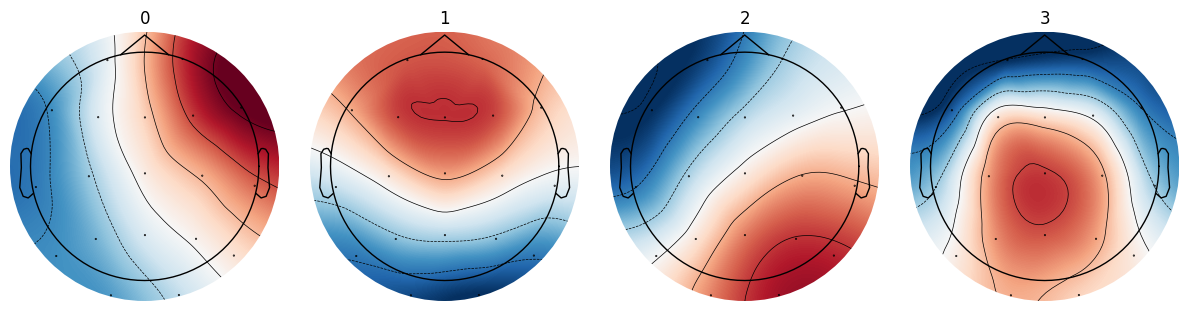

In [22]:
# group level clustering
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(group_cluster_centers, n_jobs=-1)
ModK.plot();

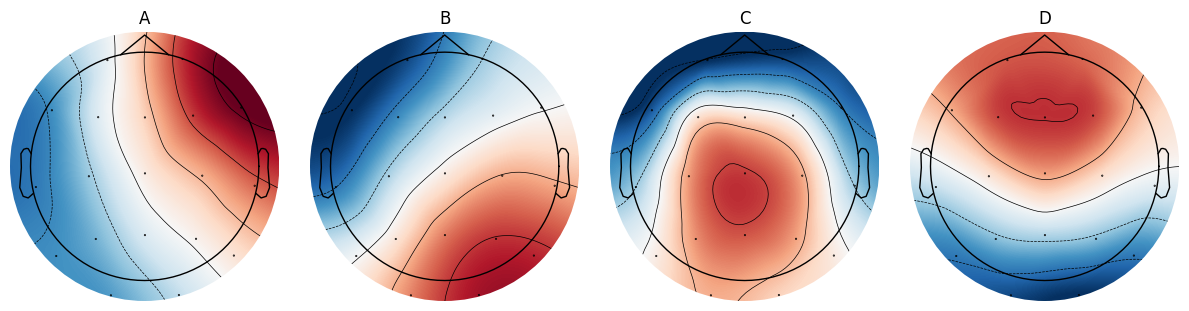

In [23]:
ModK.reorder_clusters(order=[0, 2, 3, 1])
ModK.rename_clusters(new_names=["A", "B", "C", "D"])
# Plot and modify
fig = ModK.plot();  # Generate the plot
# fig.savefig("group_level_clustering_FTD.png", dpi=300)  # Save the plot as a PNG file

In [35]:
subject_ids = np.arange(1, len(dementia_files)+1)

## Microstate parameters Dementia

In [36]:
ms_data_f = list()
length = 0
transition_prob_f = pd.DataFrame()

for file_path, subject_id in zip(patients_f, subject_ids):  # Ensure subject IDs align with file paths
    # Load Data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw.pick("eeg")
    raw.crop(0, 479.098)  # Crop the dataset to speed up computation
    raw.set_eeg_reference("average")
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)  # Apply band-pass filter (e.g., theta band)
    
    # Define epoch duration (5 seconds) and create epochs
    epoch_duration = 5  # seconds
    epochs = mne.make_fixed_length_epochs(raw, duration=epoch_duration)
    epochs.load_data()
    
    for i in range(len(epochs)):
    
        # Perform microstate segmentation on the entire Epochs object
        # segmentation = ModK.predict(epochs[i] , factor=10, half_window_size=8)  # Perform microstate segmentation
        segmentation = ModK.predict(epochs[i])  # Perform microstate segmentation
    
        # Process segmentation results to compute microstate parameters
        parameters = segmentation.compute_parameters()  # Compute parameters for all epochs

        # Compute transition probabilities
        T_observed = segmentation.compute_transition_matrix()

        # Create a DataFrame for the transition matrix and add it to single_row_df
        transition_row = pd.DataFrame([pd.DataFrame(T_observed).values.flatten()])
        transition_prob_f = pd.concat([transition_prob_f, transition_row], ignore_index=True)
    
        # parameters["subject_id"] = subject_id
        ms_data_f.append(parameters)
    

# Convert `ms_data` to a more structured format like a DataFrame (optional, for analysis)
import pandas as pd
ms_data_f_df = pd.DataFrame(ms_data_f)


In [37]:
transition_prob_f.columns = new_columns

ms_data_f_df = pd.concat([ms_data_f_df, transition_prob_f], axis=1)
ms_data_f_df = ms_data_f_df.drop(["A_A","B_B","C_C","D_D"], axis=1)

ms_data_f_df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,A_D,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C
0,0.638075,0.127153,12.810248,0.242594,0.018937,0.686351,0.104332,13.210568,0.226181,0.017121,...,0.390625,0.261538,0.307692,0.430769,0.392157,0.176471,0.431373,0.360000,0.373333,0.266667
1,0.717197,0.256763,13.590264,0.318053,0.023403,0.704727,0.083512,11.967546,0.195132,0.016305,...,0.447761,0.440678,0.135593,0.423729,0.348837,0.186047,0.465116,0.346667,0.360000,0.293333
2,0.675701,0.098311,14.457831,0.230924,0.015972,0.688434,0.081624,13.253012,0.197590,0.014909,...,0.478873,0.500000,0.212121,0.287879,0.210526,0.298246,0.491228,0.333333,0.358025,0.308642
3,0.688961,0.150073,14.124294,0.300646,0.021286,0.703896,0.037472,10.088781,0.115012,0.011400,...,0.471429,0.560000,0.140000,0.300000,0.407407,0.148148,0.444444,0.277778,0.319444,0.402778
4,0.678331,0.103927,13.475463,0.210378,0.015612,0.709203,0.153739,14.682220,0.279566,0.019041,...,0.447761,0.561644,0.164384,0.273973,0.187500,0.479167,0.333333,0.257576,0.500000,0.242424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.580633,0.027217,12.131015,0.111605,0.009200,0.690033,0.113027,14.355034,0.190457,0.013268,...,0.483333,0.357143,0.185714,0.457143,0.245902,0.245902,0.508197,0.215054,0.365591,0.419355
2181,0.508235,0.011820,14.262756,0.088791,0.006225,0.731710,0.134810,17.878666,0.277622,0.015528,...,0.414286,0.370787,0.179775,0.449438,0.098039,0.411765,0.490196,0.351064,0.425532,0.223404
2182,0.595289,0.013417,13.470044,0.090068,0.006687,0.750013,0.125367,17.289908,0.272618,0.015767,...,0.462687,0.376471,0.082353,0.541176,0.073171,0.463415,0.463415,0.333333,0.395833,0.270833
2183,0.573564,0.010986,11.618590,0.083333,0.007172,0.719405,0.106871,15.424679,0.207933,0.013481,...,0.672414,0.441558,0.181818,0.376623,0.191176,0.382353,0.426471,0.113402,0.412371,0.474227


In [38]:
ms_data_f_df['label'] = 2  # 2 For dementia

# Concatenate AD and Normal and FTD

In [40]:
# Combine the DataFrames
df = pd.concat([ms_data_df, ms_data_hc_df, ms_data_f_df], ignore_index=True)

In [42]:
df

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,B_A,B_C,B_D,C_A,C_B,C_D,D_A,D_B,D_C,label
0,0.616782,0.075527,17.691998,0.253719,0.014341,0.601098,0.042332,14.073181,0.156815,0.011143,...,0.463768,0.333333,0.202899,0.285714,0.324675,0.389610,0.465753,0.178082,0.356164,1
1,0.615911,0.085549,15.625000,0.221955,0.014205,0.576786,0.048451,15.024038,0.177885,0.011840,...,0.567568,0.243243,0.189189,0.144928,0.289855,0.565217,0.309524,0.345238,0.345238,1
2,0.669216,0.144568,17.144010,0.306172,0.017859,0.592685,0.041344,15.328762,0.160549,0.010474,...,0.500000,0.236842,0.263158,0.348485,0.424242,0.227273,0.369231,0.215385,0.415385,1
3,0.650244,0.128484,15.530456,0.286406,0.018442,0.604290,0.045684,12.706737,0.151271,0.011905,...,0.629032,0.177419,0.193548,0.173913,0.434783,0.391304,0.373134,0.208955,0.417910,1
4,0.553203,0.049266,16.876779,0.192355,0.011398,0.637375,0.056603,13.013420,0.148841,0.011438,...,0.593750,0.156250,0.250000,0.162162,0.270270,0.567568,0.375000,0.272727,0.352273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,0.580633,0.027217,12.131015,0.111605,0.009200,0.690033,0.113027,14.355034,0.190457,0.013268,...,0.357143,0.185714,0.457143,0.245902,0.245902,0.508197,0.215054,0.365591,0.419355,2
6551,0.508235,0.011820,14.262756,0.088791,0.006225,0.731710,0.134810,17.878666,0.277622,0.015528,...,0.370787,0.179775,0.449438,0.098039,0.411765,0.490196,0.351064,0.425532,0.223404,2
6552,0.595289,0.013417,13.470044,0.090068,0.006687,0.750013,0.125367,17.289908,0.272618,0.015767,...,0.376471,0.082353,0.541176,0.073171,0.463415,0.463415,0.333333,0.395833,0.270833,2
6553,0.573564,0.010986,11.618590,0.083333,0.007172,0.719405,0.106871,15.424679,0.207933,0.013481,...,0.441558,0.181818,0.376623,0.191176,0.382353,0.426471,0.113402,0.412371,0.474227,2


# Train test split

In [43]:
correlations = df.corr(method = 'pearson')
print(correlations['label'].sort_values(ascending= False).to_string())

label            1.000000
B_meandurs       0.291061
C_B              0.249770
B_gev            0.243537
B_timecov        0.235460
D_C              0.218262
C_A              0.206435
B_D              0.196862
A_meandurs       0.142619
A_timecov        0.077898
A_B              0.060119
B_occurrences    0.042189
A_D              0.029704
A_gev            0.007424
unlabeled        0.006510
C_timecov       -0.022100
C_meandurs      -0.030359
C_occurrences   -0.035218
B_A             -0.054906
D_B             -0.062853
C_gev           -0.089542
A_occurrences   -0.092674
A_C             -0.116666
B_mean_corr     -0.119658
D_A             -0.132441
D_occurrences   -0.149225
D_meandurs      -0.151607
D_timecov       -0.172186
B_C             -0.176481
D_gev           -0.337172
C_D             -0.338519
C_mean_corr     -0.400246
D_mean_corr     -0.425672
A_mean_corr     -0.483294


In [44]:
df= df.drop(columns = ['unlabeled']) #dropping unnecessary columns

In [45]:
# df = output_df

from sklearn.preprocessing import LabelEncoder

df_features= df.drop(columns = ['label'])
df_label = df['label']

X= df_features
y = df_label

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
StandardScaler_df = scaler1.fit_transform( X )       
StandardScaler_df

array([[-0.67622125, -0.2993247 ,  1.12760602, ...,  0.93870087,
        -1.22561209,  0.46224488],
       [-0.69093098, -0.14118822,  0.25092189, ..., -0.43362484,
         0.09011422,  0.35883945],
       [ 0.20860969,  0.79009318,  0.89518542, ...,  0.09084291,
        -0.9319953 ,  1.02269993],
       ...,
       [-1.03892605, -1.2793848 , -0.66306795, ..., -0.22448126,
         0.48836211, -0.34532065],
       [-1.4055493 , -1.31773697, -1.4483326 , ..., -2.15636427,
         0.61853531,  1.57957721],
       [-1.17994043, -1.26198193, -1.67875506, ..., -0.7808032 ,
        -0.34467877,  1.25565776]])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(StandardScaler_df, y, test_size=0.3, random_state=42 )

print(" Train data shape X :", X_train.shape)
print(" Train data shape y:", y_train.shape)

print(" Test data shape X :", X_test.shape)
print(" Test data shape y :", y_test.shape)

 Train data shape X : (4588, 32)
 Train data shape y: (4588,)
 Test data shape X : (1967, 32)
 Test data shape y : (1967,)


In [47]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
# Start timing the cell you want to exclude
exclude_start_time = time.time()

In [49]:
# Initializing classifiers with default parameters
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'SVM': {'C': np.logspace(-2, 2, 5), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'KNN': {'n_neighbors': np.arange(1, 11)},
    'Decision Tree': {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'Logistic Regression': {'C': np.logspace(-2, 2, 5), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]},
    # 'Naive Bayes': {},
    # 'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [ 0.01, 0.1, 0.5, 1], 'max_depth': np.arange(1, 11)}
}

# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}
for classifier_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_classifiers[classifier_name] = grid_search.best_estimator_
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")

SVM: Best parameters - {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'}, Best score - 0.9485632081500963
Random Forest: Best parameters - {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}, Best score - 0.8840488188489986
KNN: Best parameters - {'n_neighbors': 10}, Best score - 0.8766376100906859
Decision Tree: Best parameters - {'criterion': 'entropy', 'max_depth': 9}, Best score - 0.7999170830333829
Logistic Regression: Best parameters - {'C': 10.0, 'solver': 'lbfgs'}, Best score - 0.9367923250725226
AdaBoost: Best parameters - {'learning_rate': 1, 'n_estimators': 200}, Best score - 0.8857905503168189


In [50]:
# End timing for the excluded cell
exclude_end_time = time.time()

In [51]:
# Compute the excluded cell's execution time
excluded_time = exclude_end_time - exclude_start_time
print(f"Excluded cell execution time: {excluded_time:.2f} seconds")

Excluded cell execution time: 307.43 seconds


In [52]:
# --- remaining cells that should be counted ---
remaining_start_time = time.time()

In [53]:
# Testing the best models on test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Testing models on the test data...")
for classifier_name, best_model in best_classifiers.items():
    # Predicting on the test data
    y_pred = best_model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"{classifier_name}:")
    print(f"Accuracy on test data: {accuracy:.4f}")
    
    # # Compute and display classification report in decimals
    # report = classification_report(y_test, y_pred, output_dict=True)
    # report_df = pd.DataFrame(report).transpose()
    # print(report_df.round(4)*100)
    
    # # Confusion matrix
    # print("\nConfusion Matrix:")
    # print(confusion_matrix(y_test, y_pred))
    # print("\n" + "-"*50 + "\n")


Testing models on the test data...
SVM:
Accuracy on test data: 94.6619
Random Forest:
Accuracy on test data: 88.4596
KNN:
Accuracy on test data: 88.5613
Decision Tree:
Accuracy on test data: 79.1561
Logistic Regression:
Accuracy on test data: 93.9502
AdaBoost:
Accuracy on test data: 89.2730


              precision  recall  f1-score    support
0                 93.76   93.47     93.62   65900.00
1                 97.65   97.50     97.58   68100.00
2                 92.38   92.82     92.60   62700.00
accuracy          94.66   94.66     94.66      94.66
macro avg         94.60   94.60     94.60  196700.00
weighted avg      94.67   94.66     94.66  196700.00
Train Accuracy: 98.954
Test Accuracy: 94.66
Multiclass AUC Score: 0.9930


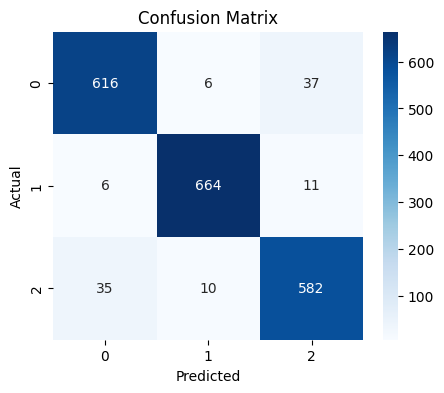

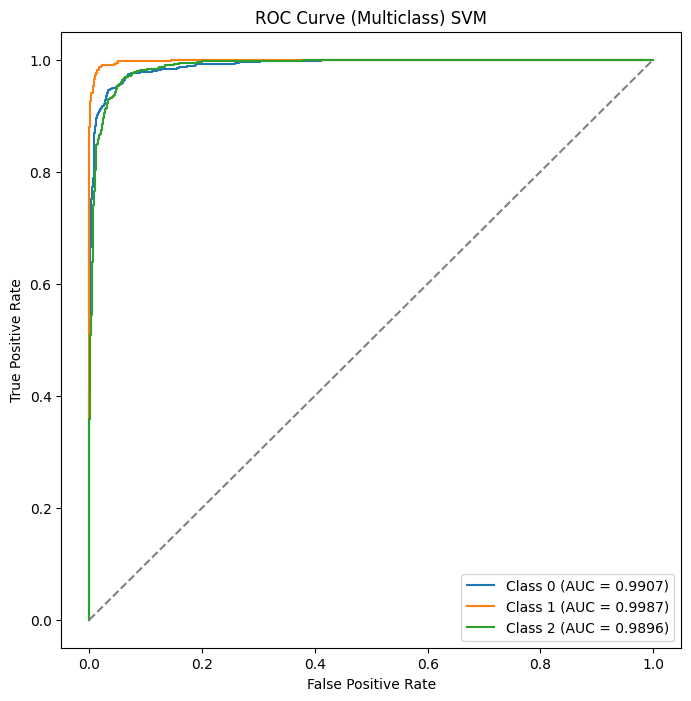

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the SVM classifier
svm_classifier = SVC(C=10, gamma='auto', kernel='rbf',  probability=True)  # You can also try other kernels like 'rbf'

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_SVM = svm_classifier.predict(X_test)

# Compute and display classification report in decimals
report = classification_report(y_test, y_pred_SVM, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)

# Display train and test accuracy
print("Train Accuracy:", accuracy_score(svm_classifier.predict(X_train), y_train).round(5)*100)
print("Test Accuracy:", accuracy_score(y_pred_SVM, y_test).round(4)*100)

y_probs_svm = svm_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_svm, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(svm_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_svm[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_svm[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) SVM')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 90.77   83.61     87.05   65900.00
1                 92.27   91.19     91.73   68100.00
2                 82.82   90.75     86.61   62700.00
accuracy          88.51   88.51     88.51      88.51
macro avg         88.62   88.52     88.46  196700.00
weighted avg      88.76   88.51     88.53  196700.00
Train Accuracy: 99.32
Test Accuracy: 88.51
Multiclass AUC Score: 0.9785


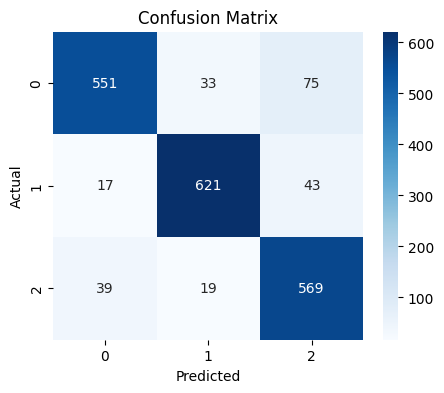

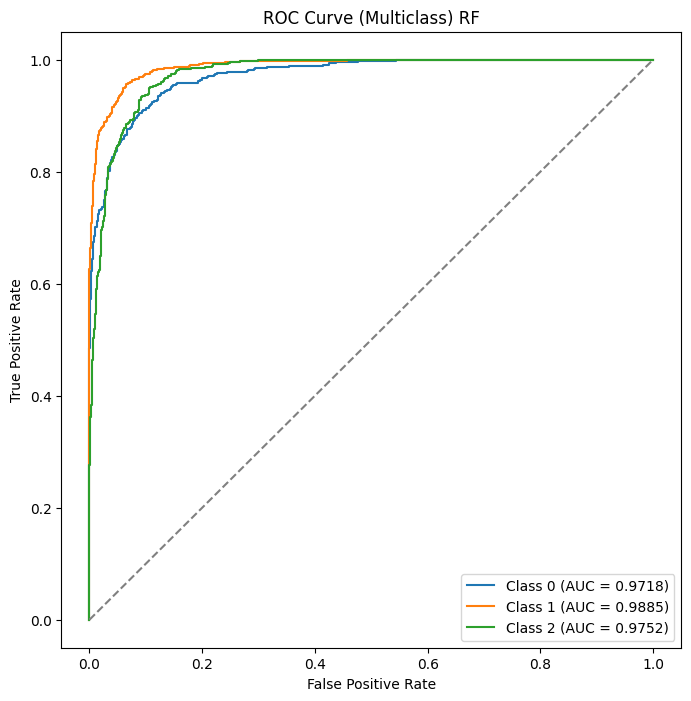

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 200 )

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_RF = rf_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_RF, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)

print("Train Accuracy:", accuracy_score(rf_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_RF, y_test).round(4)*100)

y_probs_rf = rf_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_rf, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(rf_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_rf[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_rf[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) RF')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 88.20   86.19     87.18   65900.00
1                 89.99   92.36     91.16   68100.00
2                 87.34   86.92     87.13   62700.00
accuracy          88.56   88.56     88.56      88.56
macro avg         88.51   88.49     88.49  196700.00
weighted avg      88.54   88.56     88.54  196700.00
Train Accuracy: 91.13
Test Accuracy: 88.56
Multiclass AUC Score: 0.9745


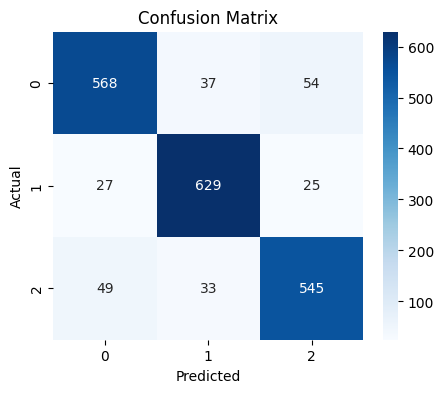

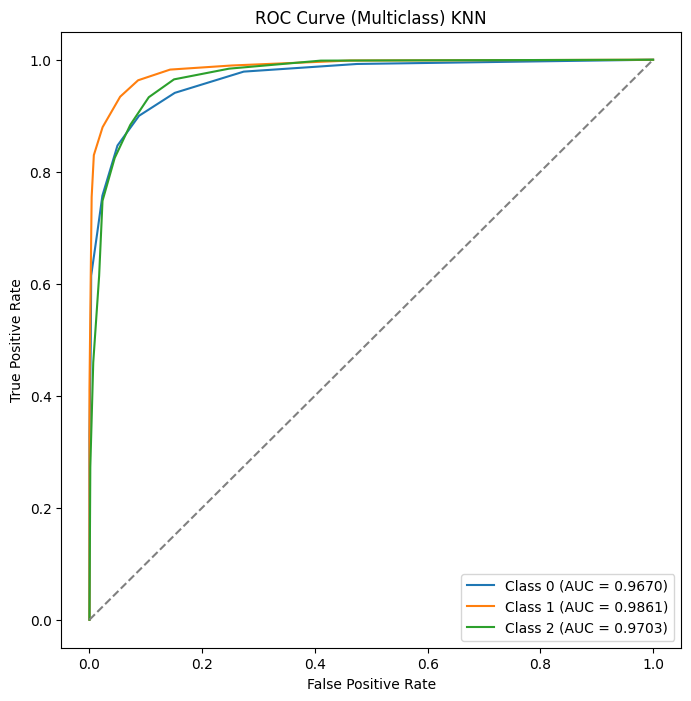

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_KNN = knn_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_KNN, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)
print("Train Accuracy:", accuracy_score(knn_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_KNN, y_test).round(4)*100)

y_probs_knn = knn_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_knn, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(knn_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_knn[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_knn[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) KNN')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                77.728  78.907    78.313   65900.000
1                82.994  83.847    83.419   68100.000
2                77.049  74.960    75.990   62700.000
accuracy         79.359  79.359    79.359      79.359
macro avg        79.257  79.238    79.241  196700.000
weighted avg     79.335  79.359    79.340  196700.000
Train Accuracy: 93.83
Test Accuracy: 79.36
Multiclass AUC Score: 0.8795


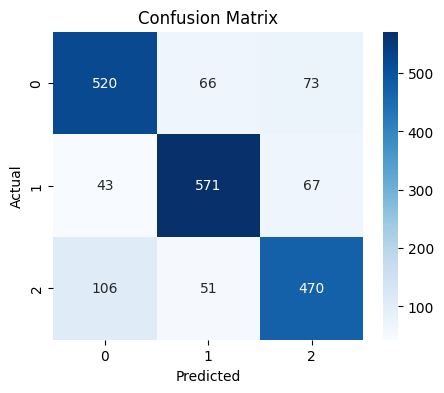

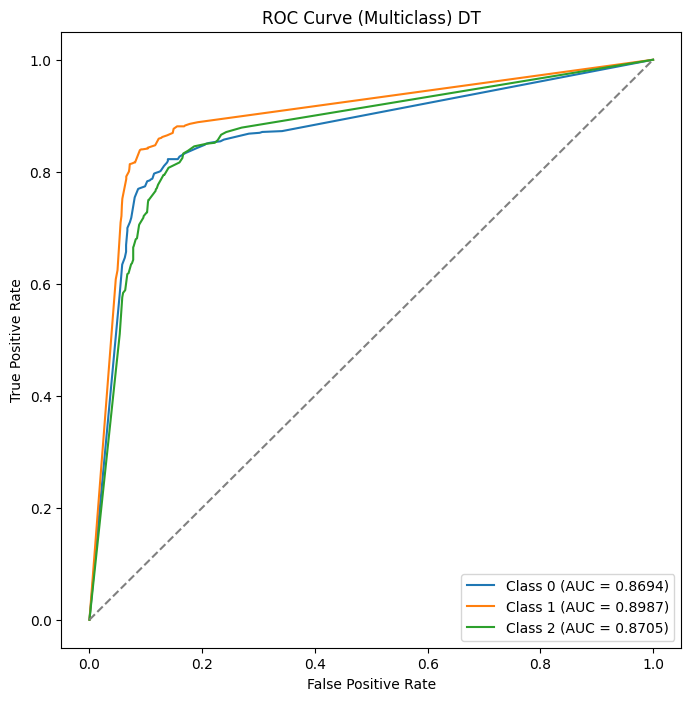

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=9)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_DT = dt_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_DT, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(dt_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_DT, y_test).round(4)*100)

y_probs_dt = dt_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_dt, multi_class='ovr')
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(dt_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_dt[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_dt[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) DT')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                92.879  93.020    92.949   65900.00
1                97.478  96.476    96.974   68100.00
2                91.311  92.185    91.746   62700.00
accuracy         93.950  93.950    93.950      93.95
macro avg        93.889  93.894    93.890  196700.00
weighted avg     93.971  93.950    93.959  196700.00
Train Accuracy: 94.05
Test Accuracy: 93.95
AUC Score (Macro-Averaged): 0.9916


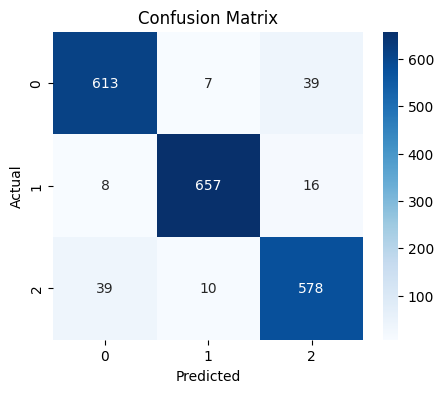

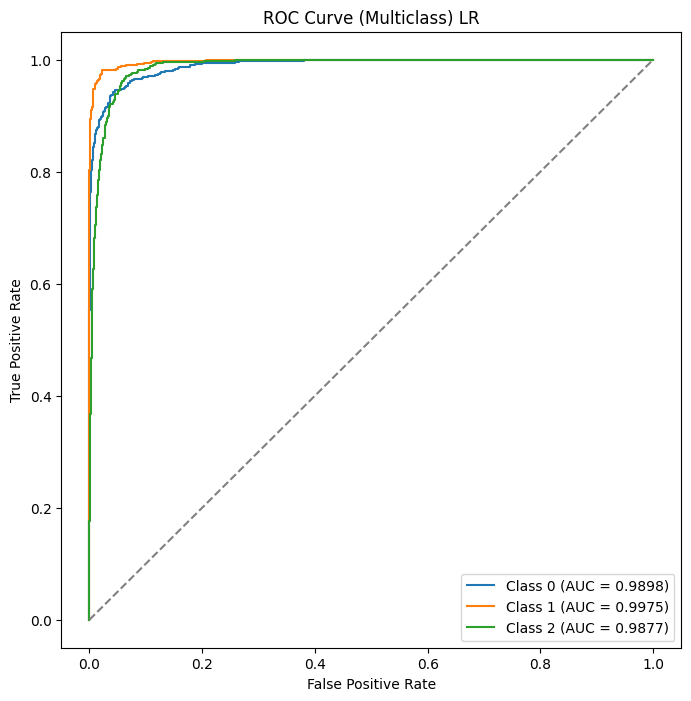

In [67]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(C=10, solver='lbfgs')

# Train the model
lr_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_LR = lr_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_LR, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(lr_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_LR, y_test).round(4)*100)

y_probs_lr = lr_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_lr, multi_class='ovr')
print("AUC Score (Macro-Averaged):", round(auc_score, 4))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(lr_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_lr[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_lr[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) LR')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                86.057  87.102    86.576   65900.000
1                98.862  89.280    93.827   68100.000
2                83.796  91.547    87.500   62700.000
accuracy         89.273  89.273    89.273      89.273
macro avg        89.571  89.310    89.301  196700.000
weighted avg     89.769  89.273    89.381  196700.000
Train Accuracy: 91.97999999999999
Test Accuracy: 89.27000000000001
AUC Score (Macro-Averaged): 0.9364


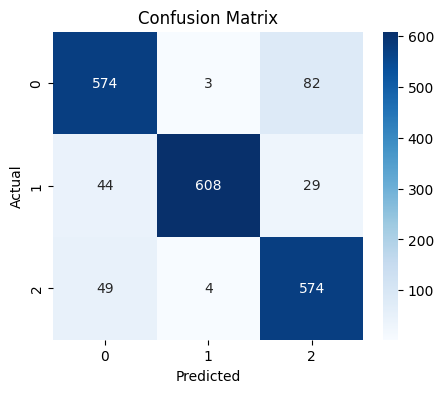

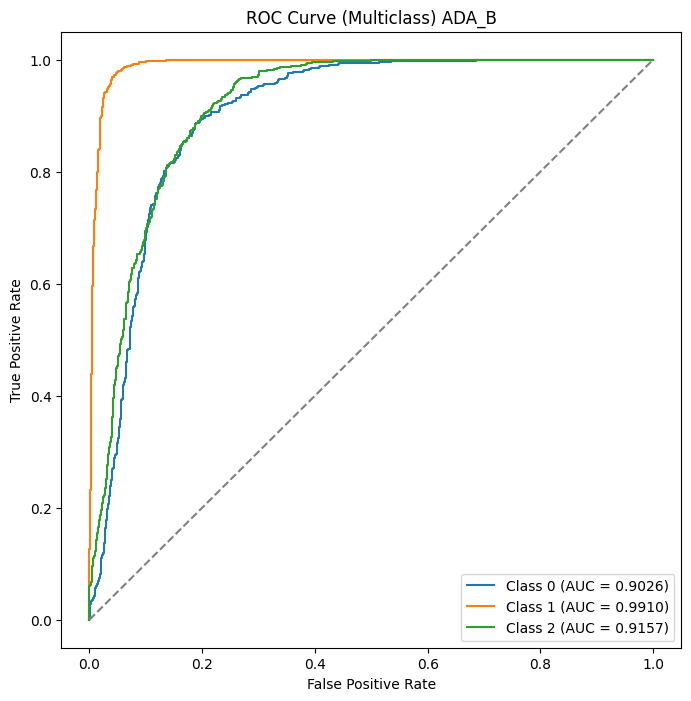

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1)

# Train the model
ada_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_Ada = ada_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_Ada, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(ada_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_Ada, y_test).round(4)*100)

y_probs_ada = ada_classifier.predict_proba(X_test)
# Calculate AUC score for multiclass

auc_score = roc_auc_score(y_test, y_probs_ada, multi_class='ovr')
print("AUC Score (Macro-Averaged):", round(auc_score, 4))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_Ada)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=ada_classifier.classes_, yticklabels=ada_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(ada_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_ada[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_ada[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass) ADA_B')
plt.legend(loc='lower right')
plt.show()

In [60]:
# End timing for the entire notebook
notebook_end_time = time.time()

In [61]:
# Compute execution time for counted cells
counted_execution_time = (notebook_end_time - notebook_start_time) - excluded_time
remaining_execution_time = notebook_end_time - remaining_start_time

# Display results
print(f"Total execution time (excluding skipped cell): {counted_execution_time:.2f} seconds")
print(f"Execution time for remaining cells: {remaining_execution_time:.2f} seconds")

Total execution time (excluding skipped cell): 335.24 seconds
Execution time for remaining cells: 14.81 seconds
